# Import Libraries

In [1]:
#Key packages:
import pandas as pd
import numpy as np

#Plots packages:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.metrics import confusion_matrix

#modelling packages:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#functions for modelling packages:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from typing import List, Dict
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc

#model evaluation:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Part One - Exploration

In [3]:
# how many observations each feature has, and mathematical information such as mean and standard deviation, 
# these information teach us about the values that each feature has.
train_data.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


In [4]:
#what is the train_data shape
print(u'- The number of samples in the train_dataset: {}'.format(train_data.shape[0]))
print(u'- The number of features in the train_dataset: {}'.format(train_data.shape[1]))
print(u'- The diffrent varibales we have: {}'.format(list(train_data.columns)))
train_data.head()

- The number of samples in the train_dataset: 10479
- The number of features in the train_dataset: 23
- The diffrent varibales we have: ['id', 'num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'info_page_duration', 'num_of_product_pages', 'product_page_duration', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'Month', 'device', 'internet_browser', 'Region', 'user_type', 'Weekend', 'A', 'B', 'C', 'D', 'purchase']


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


With columns and shape we can see how many samples there are, and how many features, this information important for the pre-processing stage.

In [5]:
#feature types and number of samples
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

In this part above we can see the diffrent type of each features, and the amount of times that each features is appearing.<br>

In [6]:
#Following this, we will create two lists below that will accompany us, 
# it's represent who are the categorical variables and who are the numerical variables in our features.
all_cols = train_data.columns
numeric = list(train_data.select_dtypes(include=[np.number]).columns)
categoric = list(set(all_cols) - set(numeric))
print("categoric = ", categoric)
print("numeric = ", numeric)


categoric =  ['Month', 'Weekend', 'info_page_duration', 'internet_browser', 'product_page_duration', 'C', 'user_type', 'A']
numeric =  ['id', 'num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'num_of_product_pages', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'device', 'Region', 'B', 'D', 'purchase']


## Checking Missing Values

In [7]:
#how many missing values in each feature 
train_data.isnull().sum()

id                           0
num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser           563
Region                      19
user_type                   23
Weekend                     23
A                          706
B                           23
C                           23
D                        10374
purchase                     0
dtype: int64

We can see there are a lot of missing values in "total_duration" and in feature "D"

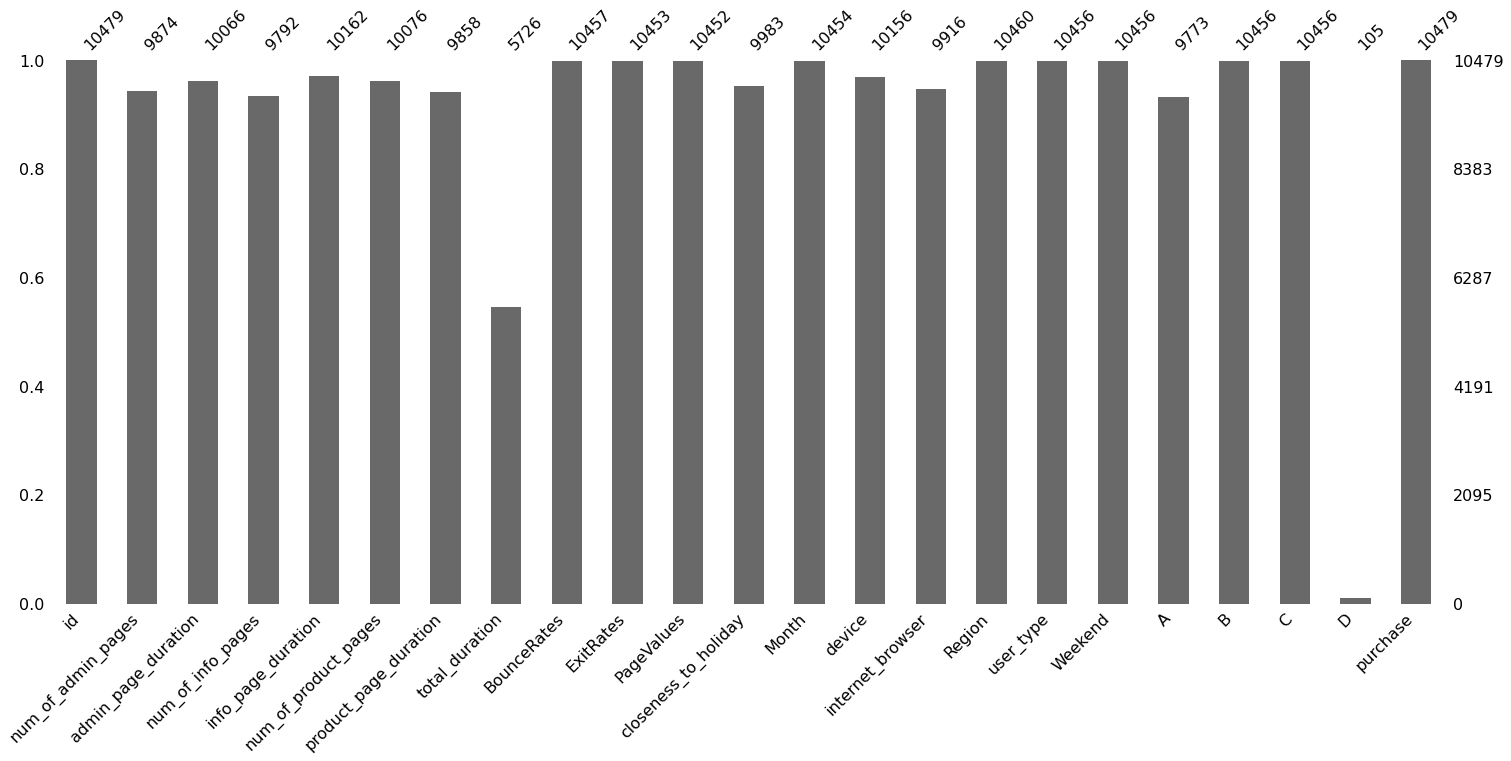

In [8]:
#plotting of the missing values
msno.bar(train_data)

here we can see clearly that 'total_duraion_ and 'D' features have a lot of missing values, therefor we may consider remove them from data. 

## Data Distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202A44F32B0>,
      dtype=object)

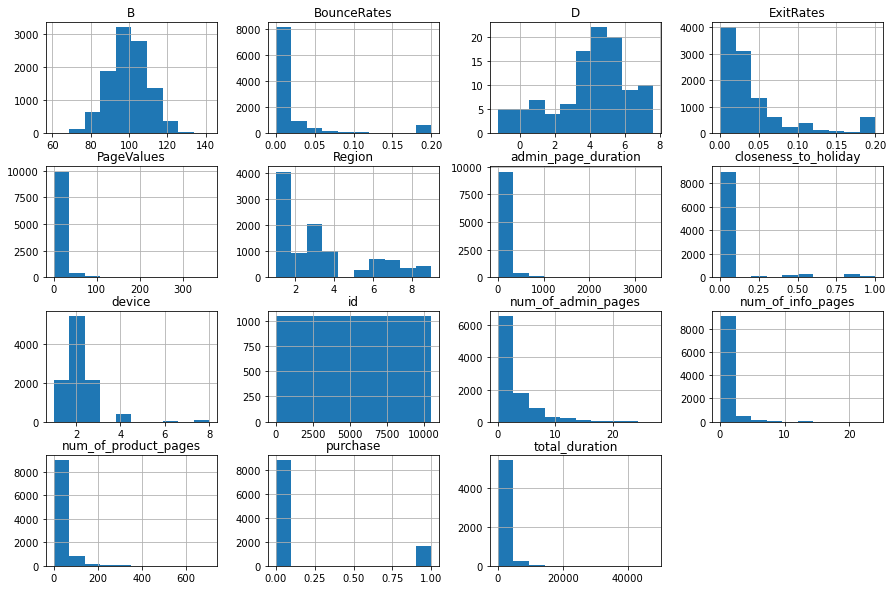

In [9]:
#plotting numeric feature distributions:
train_data.iloc[:,:24].hist(figsize=(15,10))


We can see some features behaving in a normal approximation: "B", "device", "ExitRates". The other features are also close to a normal distribution but you can see that there are a lot of 0 values in the data. Data that are normally distributed are important for the models. furthermore, we can see "id" does not have influence on the data, because it's only represent the number of the sample. 

## Visual normality on some numeric features

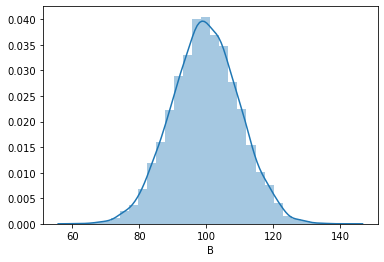

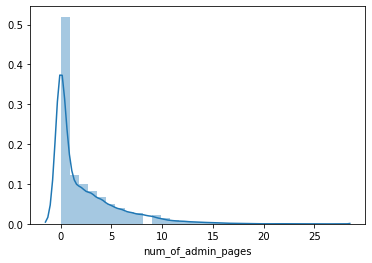

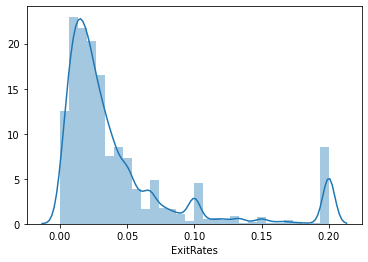

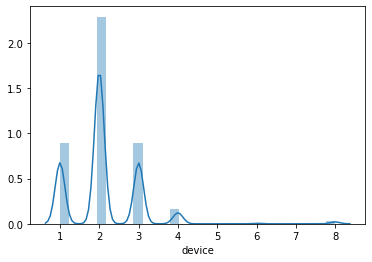

In [10]:
def plot_normality(feature):
    sns.distplot(train_data[feature], bins=30)
    plt.show()

for f in ['B', 'num_of_admin_pages', 'ExitRates', 'device']:
    plot_normality(f)


'B' - normal distribution <br>
'ExitRate' and 'num_of_admin_pages' - close to normal distribution <br>
'device' - the values in device are discrete and this is why the graph is not continuous. We can learn from it that this feature need to be categorical but represent with number type (int). <br>

Now we gonna focus on some categoric features, to see their values and distributions:

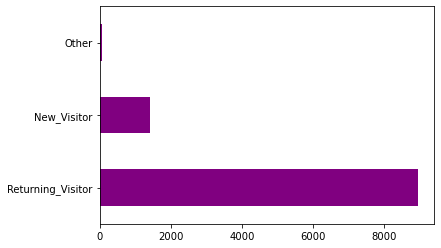

In [11]:
#plottiong user_type distribution:
train_data['user_type'].value_counts().head(3).plot.barh(color='purple')

This means that most users of the site are returning users, who are familiar with the site and its products.

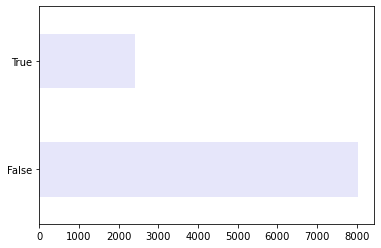

In [12]:
#plottiong weekend distribution:
train_data['Weekend'].value_counts().plot.barh(color='lavender')

The visits in the site does not focusing mostly at weekends, it means there is daily use in this ecommerce. 

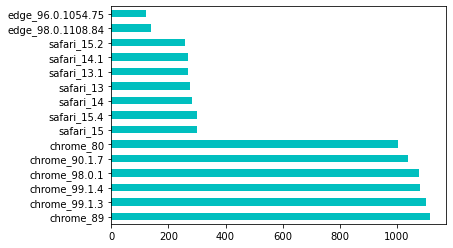

In [13]:
#plottiong internet browser distribution:
train_data['internet_browser'].value_counts().head(15).plot.barh(color='c')

In internet browser we see there are a lot of different versions on browsers. <br>
The question we ask - this many versions are important for learning the data? maybe we can focus on type of browser without it's version? 

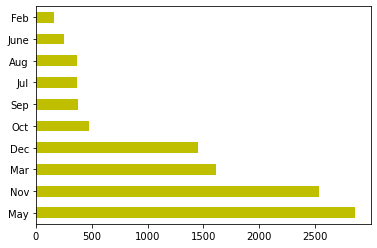

In [14]:
#plottiong month distribution:
train_data['Month'].value_counts().plot.barh(color='y')

In the last four months in the plot, we see a large number of observations. This teaches us in which month there are many visitors. We can also see that there are some missing months - January, April.

## Correlation beatween features

### Corelation Between Numeric Features and purchase

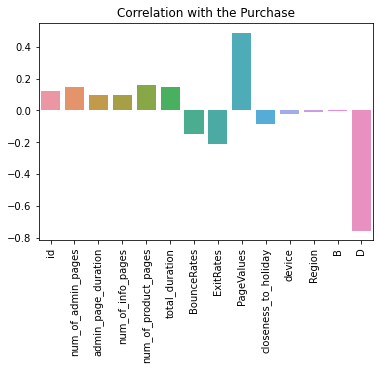

In [15]:
# Correlation of each numeric feature with purchase
data_corr = train_data.corr()['purchase'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Purchase')
plt.xticks(rotation = 90)
plt.show()

page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).<br> This value is intended to give you an idea of which page in your site contributed more to your site's revenue. Therefore we expected there to be a high correlation with this feature.<br>
Furthermore, 'D' has a low correlation with purchase because of it's many missing values.

In [16]:
#function for plotting correlation
def plot_corr(x, hue):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=x, hue=hue , data=train_data)
    plt.show()
    return

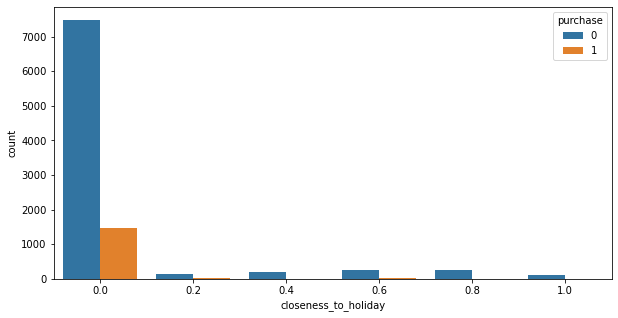

In [17]:
#check if there is correlation between closeness to holiday to purchase
plot_corr("closeness_to_holiday", "purchase")

There's not any correlation. Furthermore, it seems that most of the purchases not in holidays.

## Corelation Between Categorical features to purchase

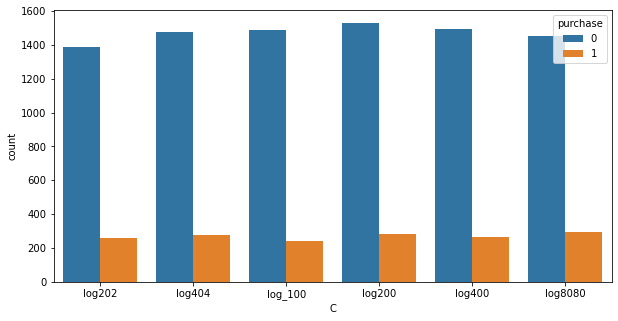

In [18]:
#check if there is correlation between C to purchase
plot_corr("C", "purchase")

The ratio between the values in 'C' is the same as the purchase / non-purchase, it can be deduced from the graph that C alone does not correlate with purchase (but perhaps given additional variables it does exist, so later we chose to leave this feature)
It can be seen that we can be transform 'C' into a numeric feature because the log turns the feature into an object-type when in fact it is numeric in its being.

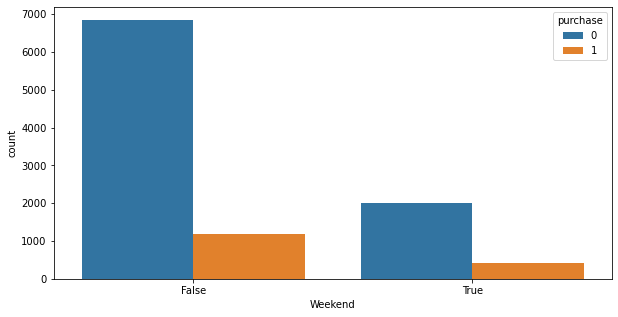

In [19]:
#check if there is correlation between Weekend and purchase
plot_corr("Weekend", "purchase")

There are no correlation, and also in "closness_to_holiday" before there was no correlation with the purchase, so it can be assumed that the site sells products for everyday use and not necessarily for the holidays and weekends.

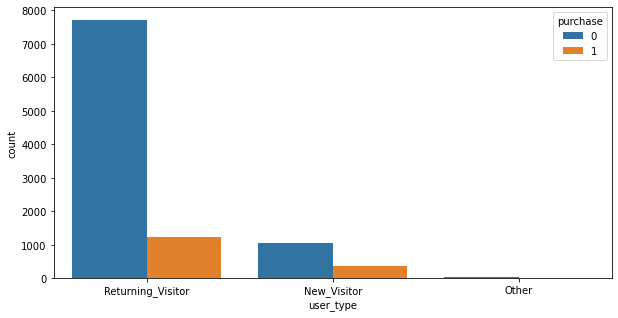

In [20]:
#check if there is correlation between user_type to purchase
plot_corr("user_type", "purchase")

It can be seen that most of the visitors who make a purchase on the site are returning visitors, so this feature has a correlation with a purchase.

# Part Two - Preprocessing

In [21]:
#Function for describe every column:

def describe_column(data, col, place):
    print(f'Column: {col}  -  Type of column: {data[col].dtype}')
    print(f'Number of  diffrent variables: {data[col].nunique()}' )
    print(f'Count the frequency of top {place} variables: ')
    for i, v in data[col].value_counts().iloc[:place].items() :
        print(i, '\t \t  \t', v)
    return


### removing features

Now we remove the "id" feature from the dataset because it only indicates the observation number and does not affect the data.<br>
Also, the features 'D' and 'total_duration' have a big amount of Nans ,there for we will remove them as well.<br>

In [22]:
for c in ["id", "D", "total_duration"]:
    describe_column(train_data, c, 5)

Column: id  -  Type of column: int64
Number of  diffrent variables: 10479
Count the frequency of top 5 variables: 
2047 	 	  	 1
5424 	 	  	 1
3403 	 	  	 1
1354 	 	  	 1
7497 	 	  	 1
Column: D  -  Type of column: float64
Number of  diffrent variables: 105
Count the frequency of top 5 variables: 
5.644564271 	 	  	 1
4.1711091080000005 	 	  	 1
4.279480848 	 	  	 1
2.7539945980000002 	 	  	 1
4.06227995 	 	  	 1
Column: total_duration  -  Type of column: float64
Number of  diffrent variables: 4811
Count the frequency of top 5 variables: 
0.0 	 	  	 332
17.0 	 	  	 9
19.0 	 	  	 9
12.0 	 	  	 9
80.0 	 	  	 8


In [23]:
def remove_feature(feature):
    train_data.drop(feature, inplace=True, axis=1)
    test_data.drop(feature, inplace=True, axis=1)
    if feature in numeric:
        numeric.remove(feature)
    else:
        categoric.remove(feature)

for c in ["id", "D", "total_duration"]:
    remove_feature(c)


#now we removing the label - "purchase" from numeric list beacuse we don't want transformaizing this feature:
numeric.remove("purchase")

Correlation between the features we keep:

In [24]:
train_data.corr()

,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,purchase
num_of_admin_pages,1.000000,0.591505,0.383974,0.436619,-0.222772,-0.317713,0.102648,-0.099734,-0.010604,-0.007737,-0.016465,0.145048
admin_page_duration,0.591505,1.000000,0.297256,0.291797,-0.141197,-0.202072,0.068009,-0.072091,-0.011671,-0.003730,-0.018782,0.097504
num_of_info_pages,0.383974,0.297256,1.000000,0.382615,-0.116471,-0.165944,0.046150,-0.051921,-0.011148,-0.032790,-0.021416,0.095563
num_of_product_pages,0.436619,0.291797,0.382615,1.000000,-0.202365,-0.292254,0.057020,-0.027799,0.000877,-0.043437,-0.019066,0.157167
BounceRates,-0.222772,-0.141197,-0.116471,-0.202365,1.000000,0.911589,-0.116746,0.081161,0.024877,-0.008510,0.008744,-0.150683
ExitRates,-0.317713,-0.202072,-0.165944,-0.292254,0.911589,1.000000,-0.172314,0.111041,0.015076,-0.009308,0.007393,-0.207804
PageValues,0.102648,0.068009,0.046150,0.057020,-0.116746,-0.172314,1.000000,-0.062112,0.019302,0.010091,-0.012400,0.486404
closeness_to_holiday,-0.099734,-0.072091,-0.051921,-0.027799,0.081161,0.111041,-0.062112,1.000000,0.018269,-0.012651,-0.005234,-0.083926
device,-0.010604,-0.011671,-0.011148,0.000877,0.024877,0.015076,0.019302,0.018269,1.000000,0.077885,0.004767,-0.020196
Region,-0.007737,-0.003730,-0.032790,-0.043437,-0.008510,-0.009308,0.010091,-0.012651,0.077885,1.000000,-0.000098,-0.009488


product_page_duration and num_of_product_pages have high corraltion, also ExitRates and BounceRates.
This variables give as preety much the same information, and there for we can reduce from each couple one variable.

In [25]:
remove_feature("BounceRates")
remove_feature("num_of_product_pages")

### Data transformation - Categorial features to numerical 

We will need to make a small change in the definition of categoric and numeric features. There are variables that are numerical by definition but in the data set they have been added a string that has made them an object type (such as "info_page_duration").<br> 
Same for the opposite, there are variables that are categorical in their definition and are defined by number that made it numeric variable (such as "Device"). 

We will move the following variables from the categorical list to the numeric list:<br>
'info_page_duration', 'product_page_duration', 'C', 'A'. 


In [26]:
#We gonna change features to numeric and categoric so this is function for update the numric and categoric list
def edit_categoric_numeric_lists (feature):
    if feature in numeric:
        numeric.remove(feature)
        categoric.append(feature)
    elif feature in categoric:
        categoric.remove(feature)
        numeric.append(feature)

#we wanna keep the lists updated for normalization done later.

"Info_page_duration" and "product_page_duration" from objec type to numeric:

In [27]:
# The data in these variables has the string "minutes" but this variable measures time and therefore numeric in its being, 
# we will remove the string and turn it into a numerical variable

def duration_to_numeric(column):
    train_data[column] = train_data[column].str.replace(' minutes', '')
    train_data[column] = train_data[column].astype('float')
    test_data[column] = test_data[column].str.replace(' minutes', '')
    test_data[column] = test_data[column].astype('float')
    return

duration_to_numeric("info_page_duration")
duration_to_numeric("product_page_duration")

#lists update:
edit_categoric_numeric_lists ("info_page_duration")
edit_categoric_numeric_lists ("product_page_duration")


Feature 'A' - This feature has 96 different values represented by a number with the string "c_", we will take down the string and make it a numeric variable. Although the variable is not identified with a particular explanation, it logically seems to be a numerical variable, beacuse of it many different values it does'nt seem like a categoric feature.

In [28]:
#For convenience and code readability, we have created a function that converts A to a numeric variable
def change_A_to_numeric(data):
    data['A'] = data['A'].astype('str')
    for value in data['A']:
        value = str(value)
        value_type = value.split("_")
        if len(value_type) == 2:
            value_type = float(value_type[1])
        elif len(value_type) == 3:
            value_type = float(value_type[1] + "." + value_type[2])
           # value_type = float(value_type[0])
        data["A"].replace({value: value_type}, inplace=True)
    data['A'] = data['A'].astype(float)
    return

change_A_to_numeric(train_data)
change_A_to_numeric(test_data)
edit_categoric_numeric_lists ('A')

Feature 'C' - 'C' is a numerical variable in its essence and in the data it is displayed with the string 'log', so we decided to lower the string in the whole column and leave it with the number only and thus make it numeric

In [29]:
#change C to numeric, there are only 6 different values in C columns so we do it without function:
train_data["C"].replace({"log200": "200",  "log400": "400",
"log404": "404",  "log8080": "8080","log_100": "100",
"log202": "202"}, inplace=True)

test_data["C"].replace({"log200": "200",  "log400": "400",
"log404": "404",  "log8080": "8080","log_100": "100",
"log202": "202"}, inplace=True)

train_data['C'] = train_data['C'].astype(float)
test_data['C'] = test_data['C'].astype(float)
edit_categoric_numeric_lists ('C')

### Filling missing values
After transforming from the categorical to numeric variables we will fill in the missing values in the data. If a variable is numeric we fill it with the median and if a variable is categorical we fill it with the most common value

In [30]:
#what is the most common values for object type features:
train_data.select_dtypes(include='object').mode().iloc[0]

Month                             May
internet_browser            chrome_89
user_type           Returning_Visitor
Weekend                         False
Name: 0, dtype: object

In [31]:
#what is the median for float type features:
train_data.select_dtypes(include='float64').median()

num_of_admin_pages         1.000000
admin_page_duration        8.000000
num_of_info_pages          0.000000
info_page_duration         0.000000
product_page_duration    598.441667
ExitRates                  0.025161
PageValues                 0.000000
closeness_to_holiday       0.000000
device                     2.000000
Region                     3.000000
A                          2.000000
B                         99.787249
C                        400.000000
dtype: float64

In [32]:
train_data.isnull().sum()

num_of_admin_pages       605
admin_page_duration      413
num_of_info_pages        687
info_page_duration       317
product_page_duration    621
ExitRates                 26
PageValues                27
closeness_to_holiday     496
Month                     25
device                   323
internet_browser         563
Region                    19
user_type                 23
Weekend                   23
A                        706
B                         23
C                         23
purchase                   0
dtype: int64

In [33]:
#function for filling na in different ways for numeric or categoric features:

def fill_na(data):
    for c in data.columns:
        if c in categoric:
        #Replace the missing values with the most frequent values present in categoric column:
            data[c] = data[c].fillna(data[c].mode().iloc[0])
        #Replace the missing values with the median present in numeric column:
        elif c in numeric:
            data[c] = data[c].fillna(data[c].median())

fill_na(train_data)
fill_na(test_data)
#for check:
train_data.isnull().sum()

num_of_admin_pages       0
admin_page_duration      0
num_of_info_pages        0
info_page_duration       0
product_page_duration    0
ExitRates                0
PageValues               0
closeness_to_holiday     0
Month                    0
device                   0
internet_browser         0
Region                   0
user_type                0
Weekend                  0
A                        0
B                        0
C                        0
purchase                 0
dtype: int64

### Data transformation - Edit categoric features before modelling
Feature "Internet browser" - We will delete the version number of each browser and unify the browsers by type (note that there are four main types)

In [34]:
describe_column(train_data, "internet_browser", 20)

Column: internet_browser  -  Type of column: object
Number of  diffrent variables: 126
Count the frequency of top 20 variables: 
chrome_89 	 	  	 1680
chrome_99.1.3 	 	  	 1101
chrome_99.1.4 	 	  	 1080
chrome_98.0.1 	 	  	 1078
chrome_90.1.7 	 	  	 1038
chrome_80 	 	  	 1005
safari_15 	 	  	 301
safari_15.4 	 	  	 299
safari_14 	 	  	 283
safari_13 	 	  	 275
safari_13.1 	 	  	 269
safari_14.1 	 	  	 267
safari_15.2 	 	  	 258
edge_98.0.1108.84 	 	  	 140
edge_96.0.1054.75 	 	  	 122
edge_96.0.1054.72 	 	  	 120
edge_99.0.1150.46 	 	  	 110
edge_97.0.1072.76 	 	  	 96
browser_5_v12 	 	  	 37
browser_5_v9 	 	  	 36


In [35]:
#function for removing the version i internet browser:
def remove_browser_version(data):
    for browser in data["internet_browser"]:
        browser = str(browser)
        browser_type = browser.split("_")
        browser_type = browser_type[0]
        data["internet_browser"].replace({browser: browser_type}, inplace=True)

remove_browser_version(train_data)
remove_browser_version(test_data)

#check the result:
describe_column(train_data, "internet_browser", 20)

Column: internet_browser  -  Type of column: object
Number of  diffrent variables: 4
Count the frequency of top 20 variables: 
chrome 	 	  	 6982
safari 	 	  	 1952
browser 	 	  	 957
edge 	 	  	 588


Feature "Weekend" - Weekend from boolean type to numeric:

In [36]:
describe_column(train_data, "Weekend", 2)

Column: Weekend  -  Type of column: bool
Number of  diffrent variables: 2
Count the frequency of top 2 variables: 
False 	 	  	 8064
True 	 	  	 2415


In [37]:
train_data['Weekend'] = train_data['Weekend'].astype('int')
test_data['Weekend'] = test_data['Weekend'].astype('int')

#we keep weekend in the categoric list beacuse we want to tranform it to dummy variable.

All variables that are categorical in nature but are presented as numbers in the data: device and region, we will add them to the list of categorical variables and remove them from the list of numerical variables.

In [38]:
edit_categoric_numeric_lists("Region")
edit_categoric_numeric_lists("device")

### Data transformation - makeing categorial features to dummys
We will now turn all the categorical variables into "dummy variables" and in this way we will turn all the categorical variables into numeric variables.

In [39]:
# Let's look at the amount of values of categorical variables
for c in categoric:
    describe_column(train_data, c, 5)

Column: Month  -  Type of column: object
Number of  diffrent variables: 10
Count the frequency of top 5 variables: 
May 	 	  	 2882
Nov 	 	  	 2539
Mar 	 	  	 1615
Dec 	 	  	 1450
Oct 	 	  	 471
Column: Weekend  -  Type of column: int32
Number of  diffrent variables: 2
Count the frequency of top 5 variables: 
0 	 	  	 8064
1 	 	  	 2415
Column: internet_browser  -  Type of column: object
Number of  diffrent variables: 4
Count the frequency of top 5 variables: 
chrome 	 	  	 6982
safari 	 	  	 1952
browser 	 	  	 957
edge 	 	  	 588
Column: user_type  -  Type of column: object
Number of  diffrent variables: 3
Count the frequency of top 5 variables: 
Returning_Visitor 	 	  	 8979
New_Visitor 	 	  	 1428
Other 	 	  	 72
Column: Region  -  Type of column: float64
Number of  diffrent variables: 9
Count the frequency of top 5 variables: 
1.0 	 	  	 4056
3.0 	 	  	 2063
4.0 	 	  	 996
2.0 	 	  	 940
6.0 	 	  	 695
Column: device  -  Type of column: float64
Number of  diffrent variables: 8
Cou

In [40]:
#here we make all the relevent categorical as dummys variables
train_data = pd.get_dummies(train_data,columns=categoric,drop_first=True)
test_data = pd.get_dummies(test_data,columns=categoric,drop_first=True)
train_data[:3]

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,product_page_duration,ExitRates,PageValues,closeness_to_holiday,A,B,...,Region_7.0,Region_8.0,Region_9.0,device_2.0,device_3.0,device_4.0,device_5.0,device_6.0,device_7.0,device_8.0
0,0.0,0.0,0.0,0.0,0.0,0.20,0.0,0.0,1.0,118.880094,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.20,0.0,0.0,3.0,113.358423,...,0,0,1,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,627.5,0.05,0.0,0.0,4.0,121.507695,...,0,0,0,0,1,0,0,0,0,0


Now we will verify that each item is categorical or numeric as it should be

In [41]:
print("\ncategoric = ", categoric)
print("\nnumeric = ", numeric, "\n")

#here we'll make sure the types of each variable
train_data.info()


categoric =  ['Month', 'Weekend', 'internet_browser', 'user_type', 'Region', 'device']

numeric =  ['num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages', 'ExitRates', 'PageValues', 'closeness_to_holiday', 'B', 'info_page_duration', 'product_page_duration', 'A', 'C'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_of_admin_pages           10479 non-null  float64
 1   admin_page_duration          10479 non-null  float64
 2   num_of_info_pages            10479 non-null  float64
 3   info_page_duration           10479 non-null  float64
 4   product_page_duration        10479 non-null  float64
 5   ExitRates                    10479 non-null  float64
 6   PageValues                   10479 non-null  float64
 7   closeness_to_holiday         10479 non-null  float64
 8   A                       

we make sure that all the features we want to identify as numeric or categoric are in the relevant list, and we printed "info" to make sure that all numeric features are float type and all categoric features are int type (presented as 1 or 0)

### Outlier
After data transformation and preprocessing and before normalization we will focus on some outliers:

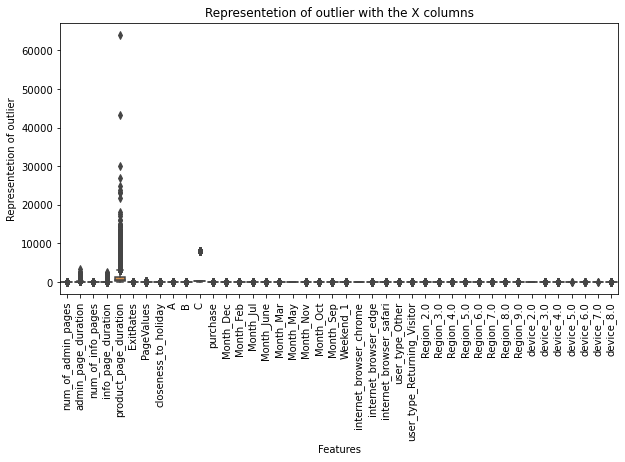

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=train_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representetion of outlier with the X columns')
plt.ylabel('Representetion of outlier')
_ = plt.xlabel('Features')

All the variables are concentrated on the lower part of the graph, with the expeption of 'product_page_duration'. That is a really good reason for standarize the Data before we train our ML model.

Now we will explore the boxplot of each numeric variable in order to verify we didn't miss any outlair.

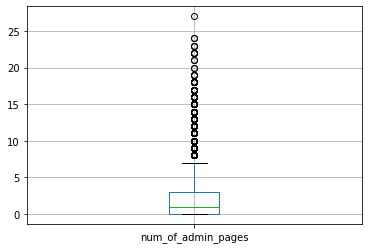

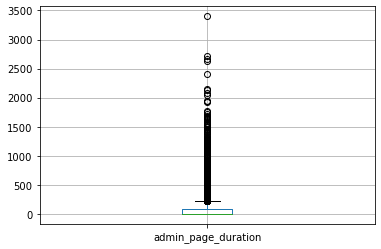

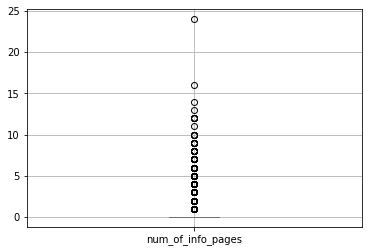

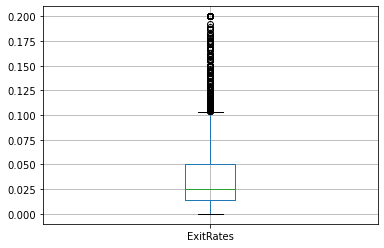

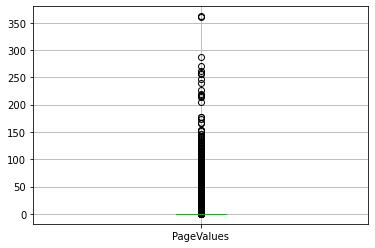

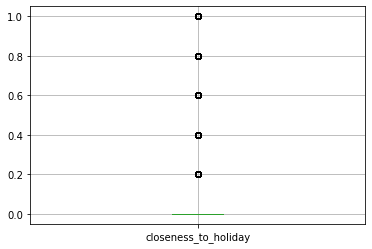

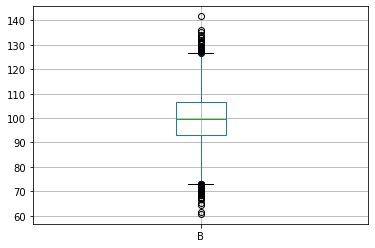

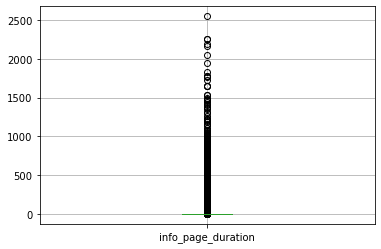

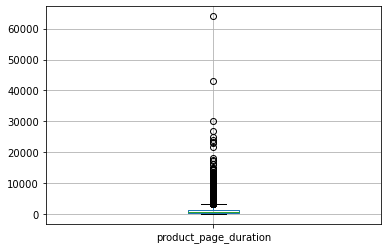

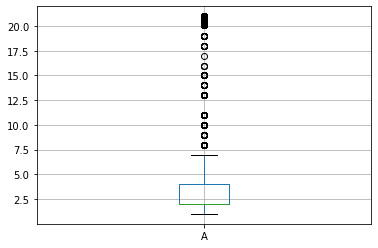

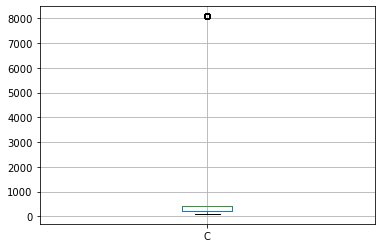

In [43]:
for c in numeric:
    train_data.boxplot(column=c)
    plt.show()

we can see here that we have some samples that do not represent the true distribution of the
data, and we do not want our model to learn from them, so we will remove them.

#### Remove Outliers
Now, we can see now that the variables that we need to edit outlier from them are:  'ExitRates','product_page_duration','B','C'.
after that we will verify it with plots

we located at which values we have the most extreme samples, that do not represent the true distribution with the help of the boxplots. and with specific function according to the boxplot we removed the unrepresenting outliers from the train. 

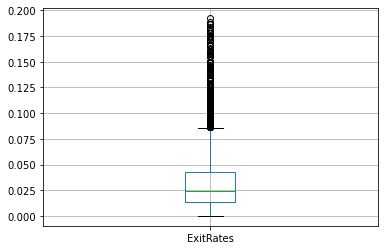

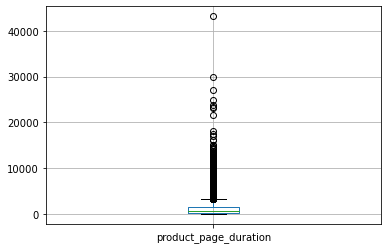

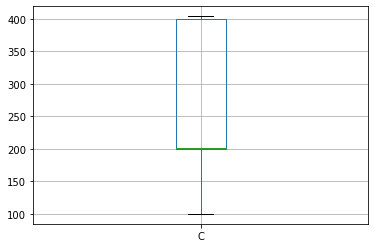

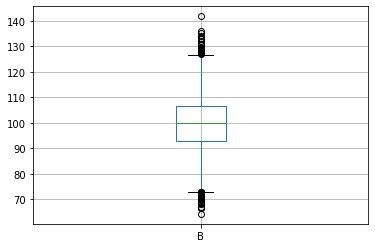

In [44]:
for c in ["ExitRates", "product_page_duration",'C']:
    q_hi  = train_data[c].quantile(0.9999)
    train_data = train_data[train_data[c] < q_hi]
    train_data.boxplot(column=c)
    plt.show()
    
for c in ['B']:
    q_low = train_data[c].quantile(0.0001)
    train_data = train_data[train_data[c] > q_low]
    train_data.boxplot(column=c)
    plt.show()

we can see here that we successed to remove the unrepresenting outliers.<br>
Note that we have chosen not to refer to the outliers in the test set, because we do not want to remove observations from test. Our choice is to study as best we can on the train set to predict the test.

## Normalization

The values in the data are not normalize. It is important to normalize the values for modelling. Models need consist range of values to predict the labels correctly, therefore we'll normalize the data values. It is important to ditinguish between numeric features and categoric features befor we normalize the data set. Because we transformed categoric features to dummy variables, now the categoric features presented with 0 and 1 values, this is why we need to normalize only the numeric features.

In [45]:
#normalizing only numeric features, we used different functions for test and train, to avoid training the "test" data 
scaler = StandardScaler()
train_data[numeric] = scaler.fit_transform(train_data[numeric])
test_data[numeric] = scaler.transform(test_data[numeric])
        

## Separete our target Y from the features X 

In [46]:
X_train = train_data.drop('purchase', axis=1)
y_train = train_data['purchase']

## Graphs

After all the tranformation we made on the data set, here we plot feature correlation after transformation:

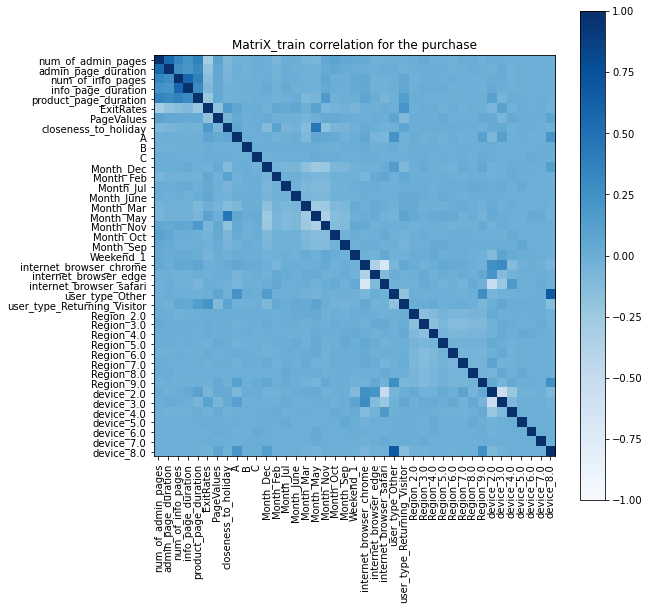

In [47]:
matriX_train_correlation = X_train.corr(method='pearson')
n_ticks = len(X_train.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), X_train.columns, rotation='vertical')
plt.yticks(range(n_ticks), X_train.columns)
plt.colorbar(plt.imshow(matriX_train_correlation, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('MatriX_train correlation for the purchase')

Here we made a final verification that we don't have any value that is highly corralted with each other.

## split to train and test
after we transformed all features to numbers we can put the data-frame into numpy arrays for modelling.<br>
Here we're splitting the train data set to train and validation:

In [48]:
X_train =  X_train.values
X_test = test_data.values

#split train to train and validation
train_and_validation = X_train
train_and_validation_labels = y_train
X_train ,X_validation ,y_train, y_validation = train_test_split(X_train,y_train,test_size = 0.2, random_state= 42, shuffle=True)


In [49]:
#looking and the shape of the splitting:

print('Train dimensions:')
print(f'data: {X_train.shape}')
print(f'labels: {y_train.shape}\n')

print('validation dimensions:')
print(f'data: {X_validation.shape}')
print(f'labels: {y_validation.shape}\n')

print('Test dimensions:')
print(f'data: {X_test.shape}')

Train dimensions:
data: (6587, 41)
labels: (6587,)

validation dimensions:
data: (1647, 41)
labels: (1647,)

Test dimensions:
data: (1851, 41)


## Feature Selection
Now after we finish to engeneer our features, we are able to run models in order to reduce the features even more. because the dimensions are still to big. It's a problem because we are still at the risk of getting a bas result due to the volume of the space, which increases and makeing the available data become sparse. We will try to use two models: PCA, forword selection. We will compare them with each other and the one with the better MSE will be the model we will use.

### PCA

In [50]:
def get_principal_components(X: np.array, p: float) -> np.array:    
    return PCA(n_components=p, whiten=True).fit(X).components_
components = get_principal_components(X_train,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(components)}')

number of components which preserve at least 99% of the variance: 30


### Forward Selection

In [51]:
#functions to perform forword selection:
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
    reg = LinearRegression()
    reg.fit(X,y)
    preds = reg.predict(X)
    rss = sum(((y - preds)**2))
    features = X.shape[1]
    n = X.shape[0]
    sigma_hat_squared = rss/(n-features-1)
    return sigma_hat_squared

def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float: 
    reg = LinearRegression()
    reg.fit(X,y)
    preds= reg.predict(X)    
    n = X.shape[0]
    features = X.shape[1]
    mse = mean_squared_error(y_true=y, y_pred=preds)
    cp_score = mse+2*((features+1)/n)*sigma_hat_squared
    return cp_score

def add_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict: 
    new_lst = []
    best_features_lst = []
    best_score = 1000000
    for feature in range(X.shape[1]):     
        if feature not in current_features: 
            new_lst = current_features + [feature]
            new_x = X[:,new_lst]
            num_check = get_mallows_cp_score(new_x,y,sigma_hat_squared)
            if best_score > num_check :        
                best_features_lst = new_lst
                best_score = num_check  
    return {'features':sorted(best_features_lst),'score':best_score}  


In [52]:
def forward_selection(X: np.array, y: np.array) -> List[int]:
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

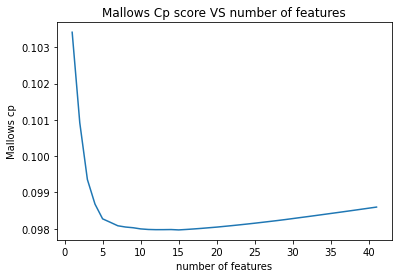

number of selected features by forward: 15


In [53]:
res = forward_selection(X_train,y_train)
print(f'number of selected features by forward: {len(res)}')

### Comparison beatween feature reduction methods

In [54]:
# calculate the test MSE for each reduced dataset
x_forward_reduced_train_and_validation = train_and_validation[:,res]
x_forward_reduced_train = X_train[:,res]
x_forward_reduced_validation = X_validation[:,res]
x_forward_reduced_test = X_test[:,res]

print(f'x_forward_reduced_train_and_validation: {x_forward_reduced_train_and_validation.shape}')
print(f'x_forward_reduced_train: {x_forward_reduced_train.shape}')
print(f'x_forward_reduced_validation: {x_forward_reduced_validation.shape}')
print(f'x_forward_reduced_test: {x_forward_reduced_test.shape}')


# get components based on train set:

train_components = get_principal_components(X_train,0.99)
x_pca_train_and_validation = np.dot(train_and_validation, train_components.T)
x_pca_train = np.dot(X_train, train_components.T)
x_pca_validation = np.dot(X_validation, train_components.T)
x_pca_test =  np.dot(X_test, train_components.T)

print(f'x_pca_train: {x_pca_train_and_validation.shape}')
print(f'x_pca_train: {x_pca_train.shape}')
print(f'x_pca_validation: {x_pca_validation.shape}')
print(f'x_pca_test: {x_pca_test.shape}')


x_forward_reduced_train_and_validation: (8234, 15)
x_forward_reduced_train: (6587, 15)
x_forward_reduced_validation: (1647, 15)
x_forward_reduced_test: (1851, 15)
x_pca_train: (8234, 30)
x_pca_train: (6587, 30)
x_pca_validation: (1647, 30)
x_pca_test: (1851, 30)


In [55]:
reg = LinearRegression()
reg.fit(x_forward_reduced_train,y_train)
predYtrain = reg.predict(x_forward_reduced_train)
train_mse_forward = mean_squared_error(y_true=y_train, y_pred=predYtrain)

predsYvalidation = reg.predict(x_forward_reduced_validation)
validation_mse_forward = mean_squared_error(y_true=y_validation, y_pred=predsYvalidation)


reg.fit(x_pca_train,y_train)
ypcatrain = reg.predict(x_pca_train)
train_mse_pca = mean_squared_error(y_true=y_train, y_pred=ypcatrain)

ypcavalidation = reg.predict(x_pca_validation)
validation_mse_pca = mean_squared_error(y_true=y_validation, y_pred=ypcavalidation)


print(f'MSE train - forward: {round(train_mse_forward,4)}')
print(f'MSE validetion - forward: {round(validation_mse_pca,4)}')



print(f'MSE train - PCA: {round(train_mse_pca,4)}')
print(f'MSE validetion - PCA: {round(validation_mse_forward,4)}')


MSE train - forward: 0.0975
MSE validetion - forward: 0.1008
MSE train - PCA: 0.0975
MSE validetion - PCA: 0.1007


In [56]:
train_components_new = get_principal_components(x_forward_reduced_train_and_validation,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(train_components_new)}')
x_pca_train_and_validation_new = np.dot(x_forward_reduced_train_and_validation, train_components_new.T)
x_pca_train_new = np.dot(x_forward_reduced_train, train_components_new.T)
x_pca_validation_new = np.dot(x_forward_reduced_validation, train_components_new.T)
x_pca_test_new =  np.dot(x_forward_reduced_test, train_components_new.T)


print(f'x_pca_train_and_validation_new: {x_pca_train_and_validation_new.shape}')
print(f'x_pca_train_new: {x_pca_train_new.shape}')
print(f'x_pca_validation_new: {x_pca_validation_new.shape}')
print(f'x_pca_test_new: {x_pca_test_new.shape}')

number of components which preserve at least 99% of the variance: 12
x_pca_train_and_validation_new: (8234, 12)
x_pca_train_new: (6587, 12)
x_pca_validation_new: (1647, 12)
x_pca_test_new: (1851, 12)


Based on the results above. forward with Mallows Cp is better with the train, but PCA is better with the validation. There for we need to find a diffrent reason to choose.<br>
We will choose run the PCA on the result of forward because in the way we will reduce the biggest amount of featurs, and we will try to avoid overfit by that .<br>

### Now we gonna update the data sets after feature reduction

In [57]:
X_train = x_pca_train_new
X_validation = x_pca_validation_new
X_test = x_pca_test_new
train_and_validation = x_pca_train_and_validation_new

# Part three - Modelling

In modelling we used https://scikit-learn.org/ to explain the hyperparameters and their default values. You can see it added in a comment before each model.

First, functions for AUC score

In [58]:
# defining functions for auc score oמ train and validation seperatly:
def auc_score(model, data, labels):
    fpr, tpr, thresholds = roc_curve(labels, model.predict_proba(data)[:,1])
    _auc = roc_auc_score(labels, model.predict_proba(data)[:,1])
    return _auc 

# another function for auc score in cv method on the whole origin train set
def auc_score_with_Kfold(mod, data, labels):
    # Convert dataframe to numpy array
    data = np.array(data)
    labels = np.array(labels)
    # For calculating the mean roc_curve:
    _auc = 0
    # Creating K-Fold Cross Validation:
    kf = KFold(n_splits=10,shuffle=True)
    for train_index, test_index in kf.split(data):
        X_train2, X_valid2 = data[train_index], data[test_index]
        y_train2, y_valid2 = labels[train_index], labels[test_index]
        mod.fit(X_train2, y_train2)
        y_prob = mod.predict_proba(X_valid2)
        y_prob = y_prob[:,1]
        #for auc score:
        fpr, tpr, thresholds = roc_curve(y_valid2, y_prob)
        roc_auc = auc(fpr, tpr)
        _auc += roc_auc
    return _auc/10
    

Another function for plotting each AUC score and ROC curve for each fold in CV

In [59]:
def plot_roc_curve_cv(mod, data, labels):
    # Convert dataframe to numpy array
    
    data = np.array(data)
    labels = np.array(labels)
    # For calculating the mean roc_curve:
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    # Creating K-Fold Cross Validation:
    kf = KFold(n_splits=10,shuffle=True)
    base_fpr = np.linspace(0, 1, 101)
    plt.figure(figsize=(5, 5))
    plt.axes().set_aspect('equal', 'datalim')
    i=1
    for train_index, test_index in kf.split(data):
        X_train2, X_valid2 = data[train_index], data[test_index]
        y_train2, y_valid2 = labels[train_index], labels[test_index]
        mod.fit(X_train2, y_train2)
        y_prob = mod.predict_proba(X_valid2)
        y_prob = y_prob[:,1]
        #plot the ROC curve:
        fpr, tpr, thresholds = roc_curve(y_valid2, y_prob)
        plt.plot(fpr,tpr,color='lightblue')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1
        #for calculating the mean roc_curve:
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
            
    plt.title('AUC score on each fold in the CV')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    return 

## Logistic Regression

About the hypeparaneters in logistic regression model below:<br>
* penalty="l2": regularization can be used to train models that generalize better on unseen data. This is how we preventing the algorithm from overfitting the training dataset. "l2" is the default choise in logistic model.<br>
* solver: The solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. Solver "liblinear" is a good choice for small data sets as we have.<br>
* C: Inverse of regularization strength, smaller values specify stronger regularization.The c we got in the search below is actually the default C. <br>
* tol: The tol parameter tells the optimization algorithm when to stop. The default tol is 1e-4, this is what we used.<br>
* max_iter: optimized to 100 maximum iteration. <br>
* Rest of te parameters we set to default: fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None). 

The optimal lambda is:  10.0 
( Best C: 0.1 )


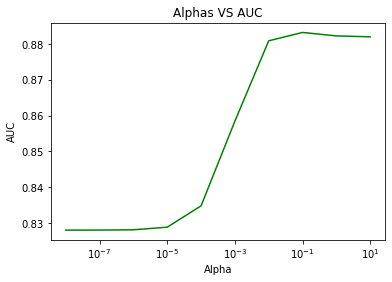

In [60]:
#Here we have chosen the ultimate C that will bring us the best AUC score,
powers = range(-8,2)
alphas = [10**p for p in powers] 
_auc=[]
for c in alphas:
    logmodel = LogisticRegression(penalty="l2", solver="liblinear", C=c)
    logmodel.fit(X_train, y_train)
    _auc.append(auc_score(logmodel, X_validation, y_validation))

alpha_opt = alphas[_auc.index(max(_auc))]

lambda_opt = 1/alpha_opt
print("The optimal lambda is: ",lambda_opt, 
      "\n( Best C:", alpha_opt, ")")

#plotting the alphas we checked using log:
plt.plot(alphas,_auc, color = 'g')
plt.title('Alphas VS AUC')
plt.xlabel('Alpha')
plt.xticks(alphas)
plt.xscale('log')
plt.ylabel('AUC')
plt.show()

In [61]:
#function for Plotting Confusion Matrix:
def plot_matrix(ConMatrix, color, typ):
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                        ConMatrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                                ConMatrix.flatten()/np.sum(ConMatrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        ax = sns.heatmap(ConMatrix, annot=labels, fmt='', cmap=color)
        ax.set_title('A confusing matrix on the ' +typ)
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])
        plt.show()

With the function above we get a matrix where there are four cells, an explanation of the cells is given here and you can see the matrix later in each of the models.<br>
The first cell on the right describes a situation where we set an example to be a "1" purchase and actually made a mistake. <br>
The first cell on the left describes a situation where we determined that an example would be a non-purchase "0" and in practice we were right. <br>
The second cell on the right describes a situation where we set an example to be a "1" purchase and we were right. <br>
The second cell on the left describes a situation where we determined that an example would be a non-purchase "0" and made a mistake.<br>


In the end we will strive for TP and TN to be as high as possible, because in this way we will know that we were right in our prediction.

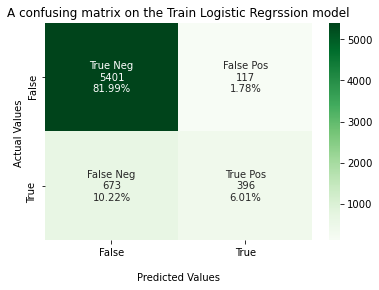

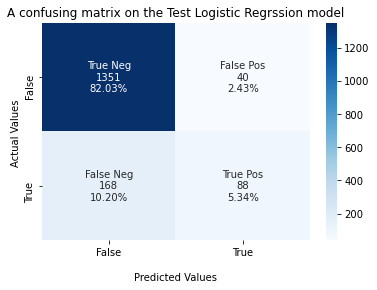

In [62]:
#fit a model:
logmodel = LogisticRegression(penalty="l2", solver="liblinear", C=alpha_opt) 
logmodel.fit(X_train, y_train)

#predictions on validations after fitting the train set:
train_preds = logmodel.predict(X_train)
validation_preds = logmodel.predict(X_validation)

#Plotting the train:
con_train = confusion_matrix(y_train, train_preds)
plot_matrix(con_train, 'Greens', 'Train Logistic Regrssion model')

#Plotting the test:
con_test = confusion_matrix(y_validation, validation_preds)
plot_matrix(con_test, 'Blues', 'Test Logistic Regrssion model')


### Logistic Regression Model Evaluation

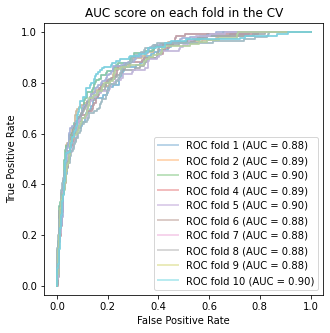

In [63]:
plot_roc_curve_cv(logmodel, train_and_validation, train_and_validation_labels)

In [64]:
#using the auc functions we creaeted, we see what is the auc score:
auc_train = auc_score(logmodel, X_train, y_train)
auc_validation = auc_score(logmodel, X_validation, y_validation)
#final score on whole data set by checking the auc in cv method:
LR_auc = auc_score_with_Kfold(logmodel, train_and_validation, train_and_validation_labels)

print("Logistic Regression Model AUC Score On Train: ", auc_train)
print("Logistic Regression Model AUC Score On Validation: ", auc_validation)
print("Logistic Regression Model AUC Score On Train and Validaion: ", LR_auc)

Logistic Regression Model AUC Score On Train:  0.8918286305791981
Logistic Regression Model AUC Score On Validation:  0.8841436017253773
Logistic Regression Model AUC Score On Train and Validaion:  0.8876908488247854


In the logistic regression model it can be seen that TP is larger than FP and so is TN larger than FN, but we certainly missed some predictions (can be seen in the plot of the confusion matrix). <br>
The AUC's we received are not bad and do not represent an overeating of the model training.

## Naïve Bayes Classifier

About the hypeparaneters in Naïve Bayes Classifier model below:<br>
* priors: the default of priors in NB is None. It means that if specified, the priors are not adjusted according to the data. Therefore we keep it adjusted to the data.<br>
* var_smoothing: The default is var_smoothing=1e-09. This parameter means portion of the largest variance of all features that is added to variances for calculation stability. 

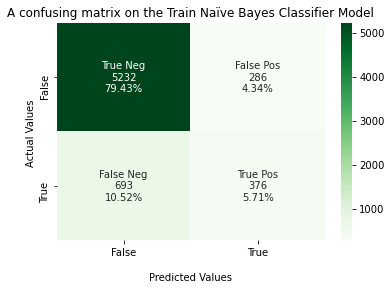

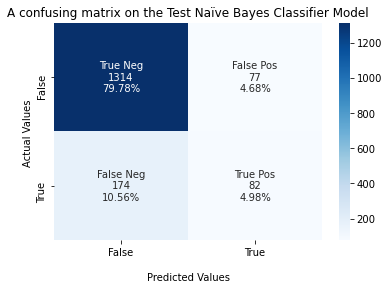

In [65]:
#fit a model:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#predictions:
train_predict = nb_model.predict(X_train)
validation_predict = nb_model.predict(X_validation)

#Plotting the train:
con_train = confusion_matrix(y_train, train_predict)
plot_matrix(con_train, 'Greens', 'Train Naïve Bayes Classifier Model')

#Plotting the test:
con_test = confusion_matrix(y_validation, validation_predict)
plot_matrix(con_test, 'Blues', 'Test Naïve Bayes Classifier Model')

### Naïve Bayes Classifier Model Evaluation

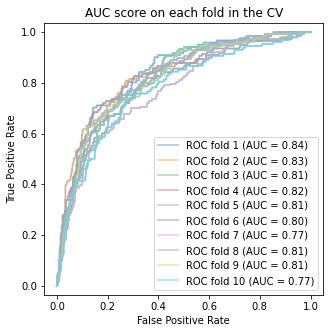

In [66]:
plot_roc_curve_cv(nb_model, train_and_validation, train_and_validation_labels)

In [67]:
auc_train = auc_score(nb_model, X_train, y_train)
auc_validation = auc_score(nb_model, X_validation, y_validation)
NB_auc = auc_score_with_Kfold(nb_model, train_and_validation, train_and_validation_labels)

print("Naive Bayes Model AUC Score On Train: ", auc_train)
print("Naive Bayes Model AUC Score On Validation: ", auc_validation)
print("Naive Bayes Model AUC Score On Train and Validation: ", NB_auc)

Naive Bayes Model AUC Score On Train:  0.8136219553253897
Naive Bayes Model AUC Score On Validation:  0.8062516849388929
Naive Bayes Model AUC Score On Train and Validation:  0.806903607441052


In the Naive Base model we got a less good AUC, our hypothesis is that using a probability-based model on the current data is less efficient than a logistic regression model

## KNN

About the hypeparaneters in KNN model below:<br>
* n_neighbors: number of neighbors to identify label as purchase or not.<br>
* weights: one option is uniform weights- All points in each neighborhood are weighted equally. And the other option is weight points by the inverse of their distance- in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.<br>
* leaf_size: This can affect the speed of the construction and query, as well as the memory required to store the tree. <br>
* p: int parameter, the default=2.
* metric: metric='minkowski' is the default.


In [68]:
#searching after best parameters with grid search. it helps us find the best parameters by auc score and cv. 
parameters = {
    'n_neighbors': [20, 25],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 22]
}
knn_model = KNeighborsClassifier()
gscv = GridSearchCV(knn_model, parameters, scoring='roc_auc', cv=3)
gscv.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 22], 'n_neighbors': [20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [69]:
#print the best parameters
best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')

Best Params: {'leaf_size': 20, 'n_neighbors': 25, 'weights': 'distance'} 



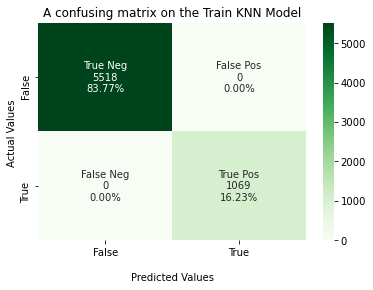

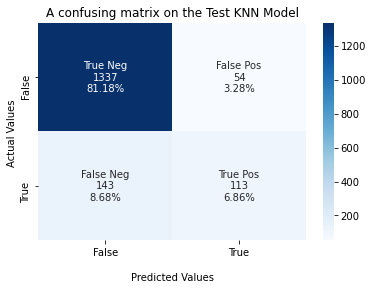

In [70]:
#fit a model with the best parameters
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)

#predictions:
train_predict = knn_model.predict(X_train)
validation_predict = knn_model.predict(X_validation)

#Plotting the train:
con_train = confusion_matrix(y_train, train_predict)
plot_matrix(con_train, 'Greens', 'Train KNN Model')

#Plotting the test:
con_test = confusion_matrix(y_validation, validation_predict)
plot_matrix(con_test, 'Blues', 'Test KNN Model')

In this plot you can clearly see overfitting on the train set, we were 100% right in our predictions.

### KNN Model Evaluation

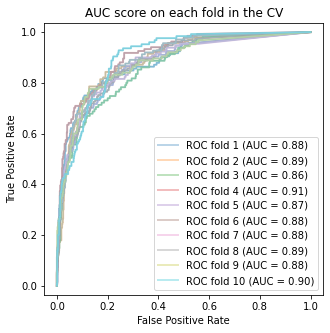

In [71]:
plot_roc_curve_cv(knn_model, train_and_validation, train_and_validation_labels)

In [72]:
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_validation)

In [73]:
auc_train = auc_score(knn_model, X_train, y_train)
auc_validation = auc_score(knn_model, X_validation, y_validation)
KNN_auc = auc_score_with_Kfold(knn_model, train_and_validation, train_and_validation_labels)

print("KNN Model AUC Score On Train: ", auc_train)
print("KNN Model AUC Score On Validation: ", auc_validation)
print("KNN Model AUC Score On Train and Validaion: ", KNN_auc)

KNN Model AUC Score On Train:  1.0
KNN Model AUC Score On Validation:  0.8822508537023724
KNN Model AUC Score On Train and Validaion:  0.887451146625007


In the different folds we got quite identical AUC scores but their overall average is significantly lower than the AUC score on the train set, so it can be said that our model is certainly overfitted.

## Multi-Layer Perceptron (ANN)

About the hypeparaneters in MLP model below:<br>
* hidden_layer_sizes: the number of neurons in the ith hidden layer. <br>
* activation: Activation function for the hidden layer, the default is "relu".<br>
* alpha: Strength of the L2 regularization term.<br>
* solver: The solver for weight optimization. <br>
* max_iter: maximum of iterations, we cose less then default (when default is 200).<br>
* The other hyper parameters are defaults: batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000) <br>

In [74]:
#searching after best parameters with grid search. it helps us find the best parameters by auc score and cv. 
parameters = {
    'hidden_layer_sizes': [100, 200],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.0001]
}
mlp_model = MLPClassifier(max_iter=100, learning_rate_init=1e-2)
gscv = GridSearchCV(mlp_model, parameters, scoring='roc_auc', cv=3)
gscv.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=MLPClassifier(learning_rate_init=0.01, max_iter=100),
             param_grid={'alpha': [0.001, 0.0001],
                         'hidden_layer_sizes': [100, 200],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc')

we set "max_iter=100, learning_rate_init=1e-2" outside the grid search to reduce the running time

In [75]:
best_params = gscv.best_params_
best_score = gscv.best_score_
print(f'Best Params: {best_params} \n')

Best Params: {'alpha': 0.0001, 'hidden_layer_sizes': 200, 'solver': 'sgd'} 



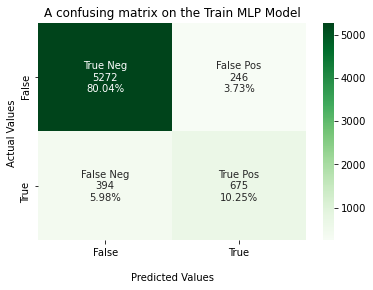

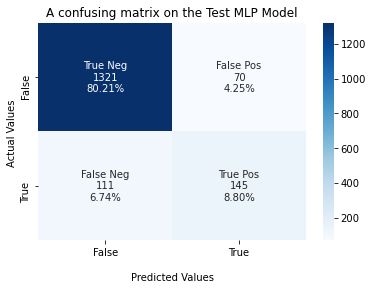

In [76]:
#fit mlp model after finding the best hyperparameters. then plot the model with confusion matrix:
mlp_model = MLPClassifier(**best_params, max_iter=100, learning_rate_init=1e-2)
mlp_model.fit(X_train, y_train)

#predict
train_predict = mlp_model.predict(X_train)
validation_predict = mlp_model.predict(X_validation)

#Plotting the train:
con_train = confusion_matrix(y_train, train_predict)
plot_matrix(con_train, 'Greens', 'Train MLP Model')

#Plotting the test:
con_test = confusion_matrix(y_validation, validation_predict)
plot_matrix(con_test, 'Blues', 'Test MLP Model')


### MLP Model Evaluation

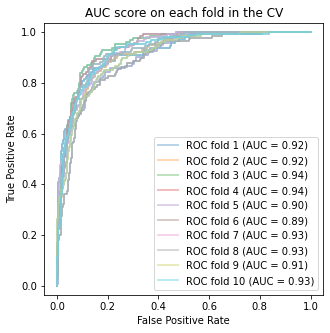

In [77]:
plot_roc_curve_cv(mlp_model, train_and_validation, train_and_validation_labels)

In [78]:
auc_train = auc_score(mlp_model, X_train, y_train)
auc_validation = auc_score(mlp_model, X_validation, y_validation)
MLP_auc = auc_score_with_Kfold(mlp_model, train_and_validation, train_and_validation_labels)

print("MLP Regression Model AUC Score On Train: ", auc_train)
print("MLP Regression Model AUC Score On Validation: ", auc_validation)
print("MLP Regression Model AUC Score On Train and Validaion: ", MLP_auc)

MLP Regression Model AUC Score On Train:  0.9291779501459804
MLP Regression Model AUC Score On Validation:  0.9227989081595973
MLP Regression Model AUC Score On Train and Validaion:  0.9197553750048882


Definitely so far the MLP model seems to be the best model we have performed, it also got a high AUC score and also does not seem to be overfitting here.<br>
In honor of the good score, we will present a summary showing the information of the model we performed:

In [79]:
## summary for mlp model
print(f"number of layers: {mlp_model.n_layers_}")
print(f"layer sizes: {[layer.shape for layer in mlp_model.coefs_]}")
print(f"layer bias sizes: {[layer.shape for layer in mlp_model.intercepts_]}")
print(f"final loss reached in training: {mlp_model.loss_}")
print(f"best loss reached in training: {mlp_model.best_loss_}")

number of layers: 3
layer sizes: [(12, 200), (200, 1)]
layer bias sizes: [(200,), (1,)]
final loss reached in training: 0.2370709142079898
best loss reached in training: 0.2370709142079898


## SVM - Support Vectors Machine

About the hypeparaneters in SVM model below:<br>
* C: Regularization parameter, default c=1.0.<br>
* degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. <br>
* probability: Whether to enable probability estimates. It has to set "True" for fit model <br>
* kernel: Specifies the kernel type to be used in the algorithm. default='rbf'.<br>
* All the rest parameters are defualt: C=1.0, gamma='scale', coef0=0.0, shrinking=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None.<br>

set parameter lists for reaching the best hyperpatameters

In [89]:
powers = range(-2,4)
Gs = [10**p for p in powers]
Ks = ['linear', 'poly', 'rbf']

itrate on hyperparameter's lists and choosing the best score for SVM model

In [91]:
G_score = []  
for g in Gs:
    clf = svm.SVC(gamma=g)
    clf.fit(X_train, y_train)
    acc = clf.score(X_validation, y_validation)
    G_score.append(acc)

Choosen_g = Gs[G_score.index(max(G_score))]
print("The optimal Gamma is: ", Choosen_g)

K_score=[]
for k in Ks:
    clf = svm.SVC(kernel=k, gamma=Choosen_g)
    clf.fit(X_train, y_train)
    acc = clf.score(X_validation, y_validation)
    K_score.append(acc)

choosen_k = Ks[K_score.index(max(K_score))]
print("The optimal Kernel is: ", choosen_k)

The optimal Gamma is:  0.1
The optimal Kernel is:  rbf


First in the SVM model we wanted to use the Grid Search but got stuck for a longer running time than usual. Therefore, we chose hyperparameters in the same way we chose the SVM model in homework and lectures - using lists, as we also did in logistic regression

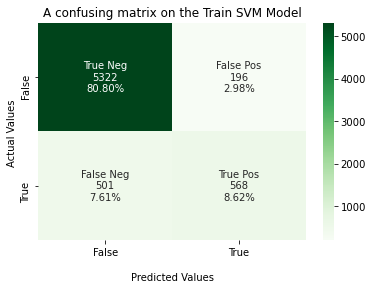

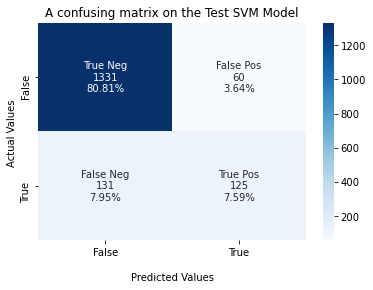

In [82]:
#training SVM model with the hyperparameters we found:
svm_model = svm.SVC(gamma=Choosen_g, probability=True, kernel= choosen_k)
svm_model.fit(X_train, y_train)

train_predict = svm_model.predict(X_train)
validation_predict = svm_model.predict(X_validation)

#Plotting the train:
con_train = confusion_matrix(y_train, train_predict)
plot_matrix(con_train, 'Greens', 'Train SVM Model')

#Plotting the test:
con_test = confusion_matrix(y_validation, validation_predict)
plot_matrix(con_test, 'Blues', 'Test SVM Model')


### SVM Model Evaluation

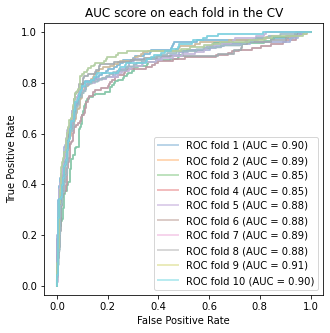

In [92]:
plot_roc_curve_cv(svm_model, train_and_validation, train_and_validation_labels)

In [94]:
auc_train = auc_score(svm_model, X_train, y_train)
auc_validation = auc_score(svm_model, X_validation, y_validation)
SVM_auc = auc_score_with_Kfold(svm_model, train_and_validation, train_and_validation_labels)

print("SVM Model AUC Score On Train: ", auc_train)
print("SVM Model AUC Score On Validation: ", auc_validation)
print("SVM Model AUC Score On Train and Validaion: ", SVM_auc)

SVM Model AUC Score On Train:  0.8997183636782216
SVM Model AUC Score On Validation:  0.8885132099209201
SVM Model AUC Score On Train and Validaion:  0.8823394964510524


The SVM model we received looked good, scoring just fine and no fear of overfitting

# Part four - Evaluation Between Models

In [85]:
#In this section we calculated FPR and TPR for each of the models we performed, we will use these values to extract a concentrated plot later:
fpr_lr, tpr_lr, thresholds = roc_curve(train_and_validation_labels, logmodel.predict_proba(train_and_validation)[:,1])
fpr_knn, tpr_knn, thresholds = roc_curve(train_and_validation_labels, knn_model.predict_proba(train_and_validation)[:,1])
fpr_nb, tpr_nb, thresholds = roc_curve(train_and_validation_labels, nb_model.predict_proba(train_and_validation)[:,1])
fpr_mlp, tpr_mlp, thresholds = roc_curve(train_and_validation_labels, mlp_model.predict_proba(train_and_validation)[:,1])
fpr_svm, tpr_svm, thresholds = roc_curve(train_and_validation_labels, svm_model.predict_proba(train_and_validation)[:,1])

For each of the models we performed we kept the average AUC score on the full training set (which includes the validation). At this point we will plot with each of the scores we calculated for each model

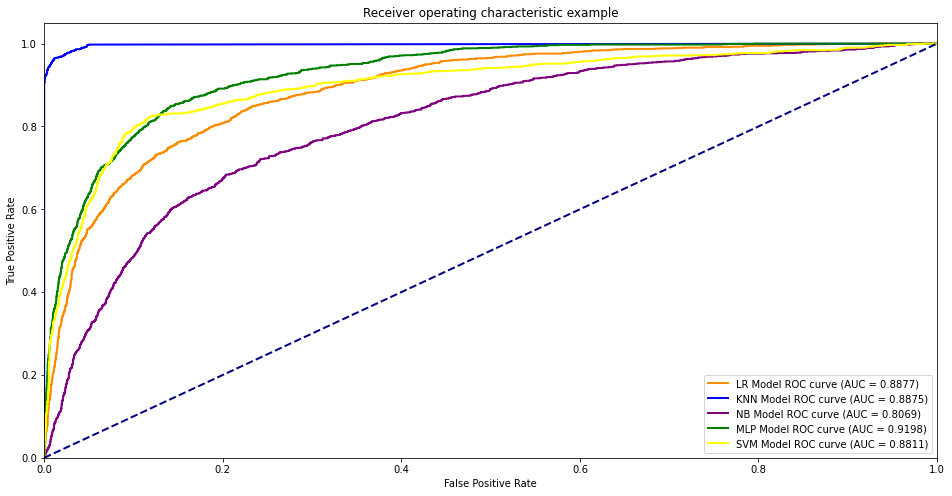

In [86]:
plt.figure(figsize=(16,8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='LR Model ROC curve (AUC = %0.4f)' % LR_auc)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN Model ROC curve (AUC = %0.4f)' % KNN_auc)
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='NB Model ROC curve (AUC = %0.4f)' % NB_auc)
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label='MLP Model ROC curve (AUC = %0.4f)' % MLP_auc)
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label='SVM Model ROC curve (AUC = %0.4f)' % SVM_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In the plot it can be seen that the KNN model reflects overfitting in its curve shape, that the NB model received the lowest score among the models, and that the most stable and high score model we received is indeed the MLP model.

# Part five - Pipeline and Predictions on test

At this point we will perform a pipeline, presenting the work steps required to optimally predict the test set labels

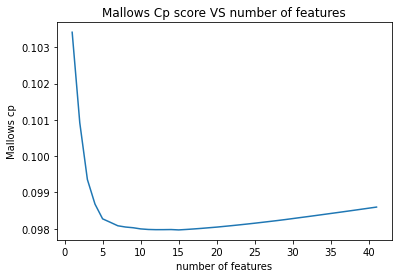

MLPClassifier(hidden_layer_sizes=200, learning_rate_init=0.01, max_iter=100,
              solver='sgd')

In [87]:
#read:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#defining our lists:
all_cols = train_data.columns
numeric = list(train_data.select_dtypes(include=[np.number]).columns)
categoric = list(set(all_cols) - set(numeric))

#removing features and updating lists:
for c in ["id", "D", "total_duration"]:
    remove_feature(c)

#now we removing the label from lists:
numeric.remove("purchase")

#removing correlated features:
remove_feature("BounceRates")
remove_feature("num_of_product_pages")

#transforming features and list updates:
duration_to_numeric("info_page_duration")
duration_to_numeric("product_page_duration")
edit_categoric_numeric_lists ("info_page_duration")
edit_categoric_numeric_lists ("product_page_duration")
change_A_to_numeric(train_data)
change_A_to_numeric(test_data)
edit_categoric_numeric_lists ('A')
train_data["C"].replace({"log200": "200",  "log400": "400",
"log404": "404",  "log8080": "8080","log_100": "100",
"log202": "202"}, inplace=True)
test_data["C"].replace({"log200": "200",  "log400": "400",
"log404": "404",  "log8080": "8080","log_100": "100",
"log202": "202"}, inplace=True)
train_data['C'] = train_data['C'].astype(float)
test_data['C'] = test_data['C'].astype(float)
edit_categoric_numeric_lists ('C')

#fill NA's:
fill_na(train_data)
fill_na(test_data)

#transforming features and update lists:
remove_browser_version(train_data)
remove_browser_version(test_data)
train_data['Weekend'] = train_data['Weekend'].astype('int')
test_data['Weekend'] = test_data['Weekend'].astype('int')
edit_categoric_numeric_lists("Region")
edit_categoric_numeric_lists("device")

#categoric features as dummys veribals
train_data = pd.get_dummies(train_data,columns=categoric,drop_first=True)
test_data = pd.get_dummies(test_data,columns=categoric,drop_first=True)

#outlier removal from train set:
for c in ["ExitRates", "product_page_duration",'C']:
    q_hi  = train_data[c].quantile(0.9999)
    train_data = train_data[train_data[c] < q_hi]
for c in ['B']:
    q_low = train_data[c].quantile(0.0001)
    train_data = train_data[train_data[c] > q_low]

#normalization and defining numpy arrays:
train_data[numeric] = scaler.fit_transform(train_data[numeric])
test_data[numeric] = scaler.transform(test_data[numeric])
X_train = train_data.drop('purchase', axis=1)
y_train = train_data['purchase']
X_train =  X_train.values 
X_test = test_data.values

#split train to train and validation
train_and_validation = X_train
train_and_validation_labels = y_train
X_train ,X_validation ,y_train, y_validation = train_test_split(X_train,y_train,test_size = 0.2, random_state= 42, shuffle=True)

#feature selection: we'll start with forword:
res = forward_selection(X_train,y_train)
x_forward_reduced_train_and_validation = train_and_validation[:,res]
x_forward_reduced_train = X_train[:,res]
x_forward_reduced_validation = X_validation[:,res]
x_forward_reduced_test = X_test[:,res]

#now we perform pca on the forword we made:
train_components_new = get_principal_components(x_forward_reduced_train_and_validation,0.99)
x_pca_train_and_validation_new = np.dot(x_forward_reduced_train_and_validation, train_components_new.T)
x_pca_train_new = np.dot(x_forward_reduced_train, train_components_new.T)
x_pca_validation_new = np.dot(x_forward_reduced_validation, train_components_new.T)
x_pca_test_new =  np.dot(x_forward_reduced_test, train_components_new.T)

#and now we updated the data sets
X_train = x_pca_train_new
X_validation = x_pca_validation_new
X_test = x_pca_test_new
train_and_validation = x_pca_train_and_validation_new

#choosing hyperparameters for model: 
parameters = {
    'hidden_layer_sizes': [100, 200],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.0001]
}
mlp_model = MLPClassifier(max_iter=100, learning_rate_init=1e-2)
gscv = GridSearchCV(mlp_model, parameters, scoring='roc_auc', cv=3)
gscv.fit(X_train, y_train)

#fit mlp model with best parameters:
mlp_model = MLPClassifier(**best_params, max_iter=100, learning_rate_init=1e-2)
mlp_model.fit(train_and_validation, train_and_validation_labels)


Once we have selected a model we will make predictions on the test set, we will export the predictions to a CSV file as requested

In [88]:
#making predictions on test:
test_prediction = mlp_model.predict(X_test)
test_predict_proba = mlp_model.predict_proba(X_test)
prediction = pd.DataFrame(test_predict_proba[:,1], columns=['predict_prob']).to_csv('Submission_group_19.csv')